# Analyse exploratoire de données

Dans ce chapitre nous abonderons l'analyse exploratoire de données comme suit :

1. La variale cible : équilibrée ou déséquilibrée
2. Typologie des variables (qualitative ou quantitatives)
3. Données manquantes
4. Variables quantitatives
    - Discretes 
    - Quantitinue
4. Variables qualitatives
    - Ordinales
    - Nominales
    - Binaires

# 0. Importer les librairies / Lecture des données

In [16]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.graph_objects as pgo
import seaborn as sns 

In [17]:
# lire les données 
data = pd.read_csv("train.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160,NaN,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98.0,N,0.0,NaN,0
3,48,F,ASY,138,NaN,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122.0,N,0.0,Up,0


# 1. La variale cible : équilibrée ou déséquilibrée

In [18]:
labels = ["Normal", "heart Disease"]
percentage_per_label = data["HeartDisease"].value_counts()/len(data)
percentage_per_label

figure = pgo.Figure(data=[pgo.Pie(labels=labels, values=percentage_per_label, hole=0.2)])

figure.show()

Le dataset est équilibré sur la varibales cible !

# 2. Typologie des variables (qualitative ou quantitatives)

In [33]:
# Identifier toutes les variables dont le type est "object" avec le dtype
CAT_VAR = [nom_col for nom_col in data.columns if data[nom_col].dtype == "object" 
           if nom_col not in  ["Sex", "ExerciseAngina"]]
print("CaT_VAR : ", CAT_VAR)
print()
# Identifier les variables binaires
BIN_VAR = ["Sex", "ExerciseAngina"]
print("BIN_VAR : ", BIN_VAR)
print()
# Le restant des variables est automatiquement de type quantitiaves 
QUANT_VAR = [nom_col for nom_col in data.columns
             if nom_col not in set(BIN_VAR).union(set(CAT_VAR))
             and  nom_col != "HeartDisease"]
print("QUANT_VAR : ", QUANT_VAR)

CaT_VAR :  ['ChestPainType', 'RestingECG', 'ST_Slope']

BIN_VAR :  ['Sex', 'ExerciseAngina']

QUANT_VAR :  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


In [20]:
print("""\n
         Nombre de variables total du dataset est {} \n
         Nombre de variables qualitatives est {} \n
         Nombre de variables quantitatives est {} \n
         La variables cible {}"""
      .format(len(data.columns), len(CAT_VAR)+len(BIN_VAR), len(QUANT_VAR), 1))



         Nombre de variables total du dataset est 12 

         Nombre de variables qualitatives est 5 

         Nombre de variables quantitatives est 6 

         La variables cible 1


# 3. Données manquantes

In [22]:
# Identifier les variables avec données manquantes 
VAR_WITH_NA = [nom_col for nom_col in data.columns if data[nom_col].isnull().sum() > 0]

# Affichage des pourcentage de données manquantes par colonne
data[VAR_WITH_NA].isnull().mean().sort_values(ascending=False)

Cholesterol      0.375867
ST_Slope         0.266297
ChestPainType    0.097087
MaxHR            0.006935
dtype: float64

# 4. Variables quantitatives

## 4.1 Variables discrètes

In [23]:
variables_dicrectes = [var for var in QUANT_VAR if len(data[var].unique()) <= 10]
variables_dicrectes

['FastingBS']

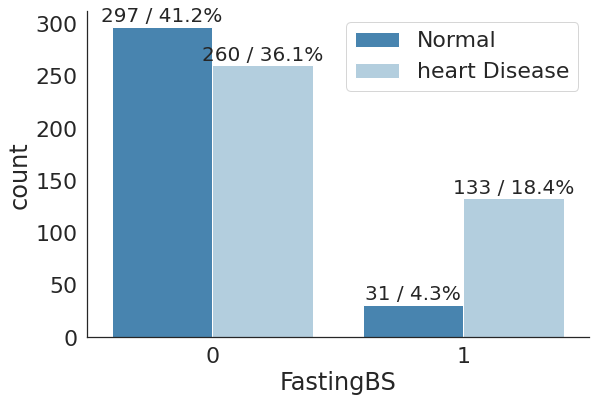

In [24]:
total_cnt = data['HeartDisease'].count()
plt.figure(figsize=(9,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=data, x='FastingBS',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

# 4.2 Variables continues

variables continues :  ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


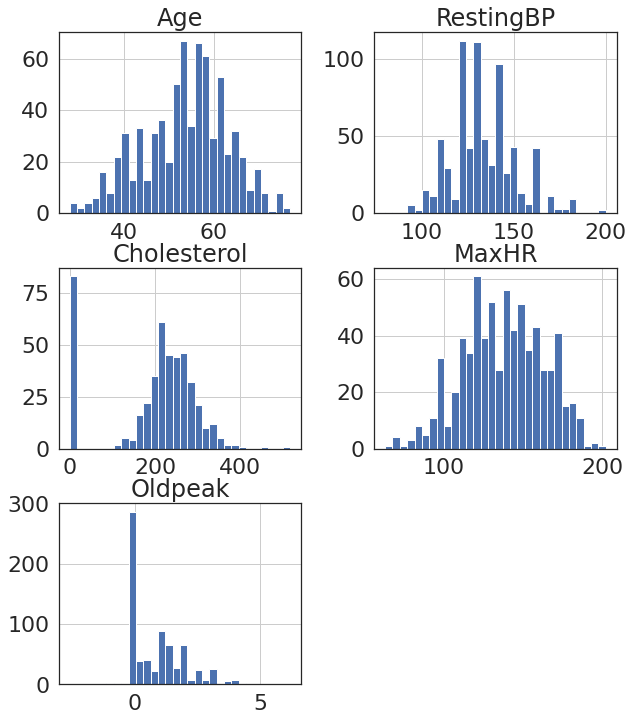

In [25]:
variables_continues = [var for var in QUANT_VAR if var not in variables_dicrectes]
print("variables continues : ", variables_continues)
data[variables_continues].hist(bins=30, figsize=(10,12))
plt.show()

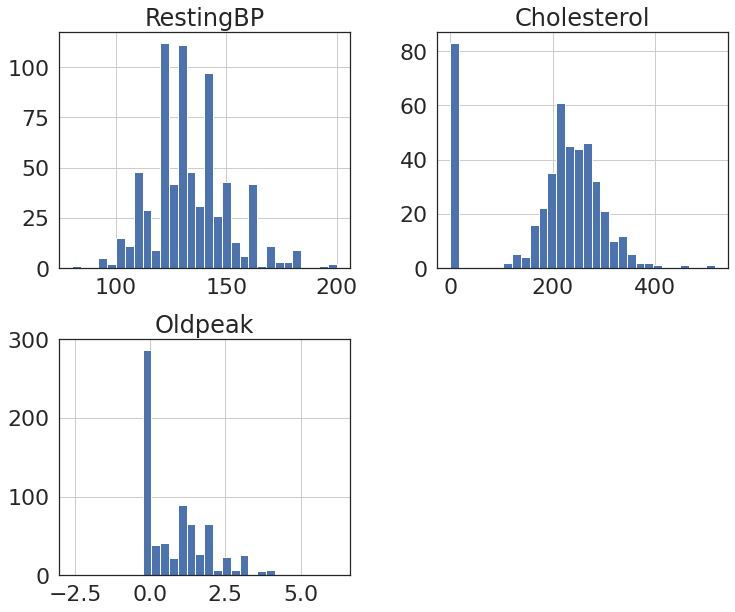

In [26]:
variables_asymitriques = ["RestingBP", "Cholesterol", "Oldpeak"]
data[variables_asymitriques].hist(bins=30, figsize=(12,10))
plt.show()

### 4.2.1 Transformation de Yeo-Johnson

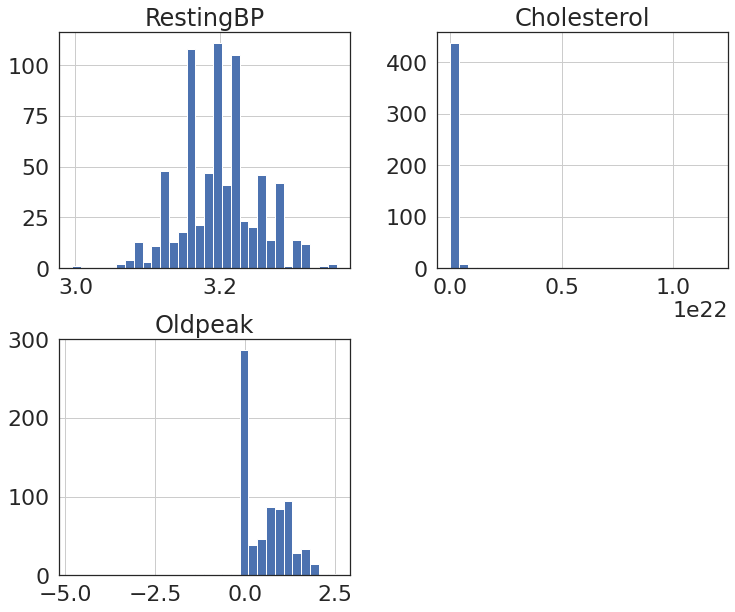

In [27]:
# compie temporaire du dataframe
tmp = data.copy()

for var in variables_asymitriques:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(data[var])

    
# plot the histograms of the transformed variables
tmp[variables_asymitriques].hist(bins=30, figsize=(12, 10))
plt.show()

### 4.2.2 Tranformation logarithmique

/home/batata/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log

/home/batata/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log

/home/batata/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log



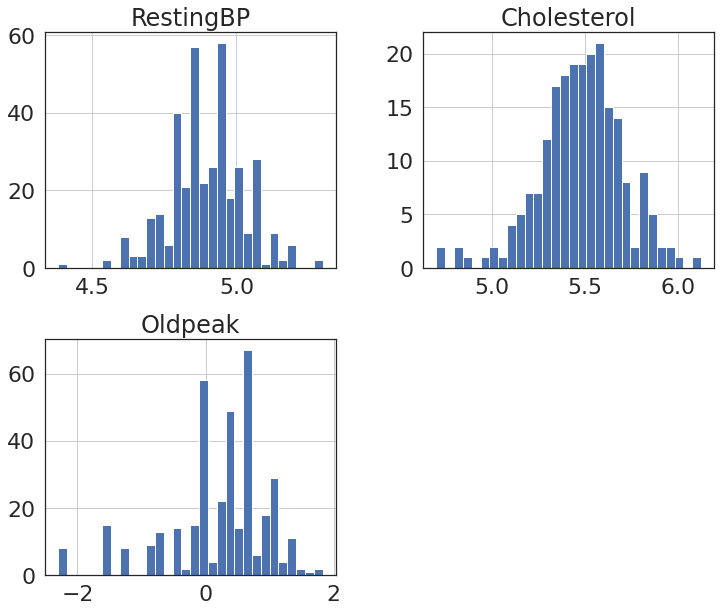

In [28]:
tmp = data.copy()

for var in variables_asymitriques:

    # transform the variable with logarithm
    tmp[var] = np.log(data[var])
    tmp = tmp.loc[tmp[var] != -np.inf]
tmp[variables_asymitriques].hist(bins=30, figsize=(12,10))
plt.show()

# 5. Variables qualitatives

In [29]:
def plot_variables_qualitatives(df, cols):
    for col in cols:
        total_cnt = data['HeartDisease'].count()
        plt.figure(figsize=(6,4))
        sns.set(font_scale = 1)
        sns.set_style("white")
        ax = sns.countplot(data=data, x=col,hue='HeartDisease',palette='Blues_r')
        for p in ax.patches:
            x, height, width = p.get_x(), p.get_height(), p.get_width()
            ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=10)
    plt.legend(labels=labels)
    sns.despine()

## 5.1 variables ordinales

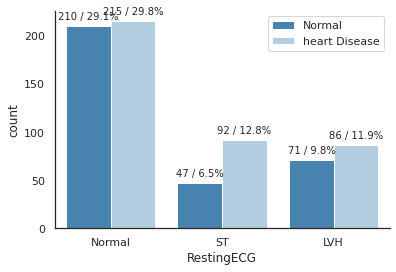

In [30]:
CAT_VAR_ORD = ['RestingECG']
plot_variables_qualitatives(data, CAT_VAR_ORD)

## 5.2 variables nominales

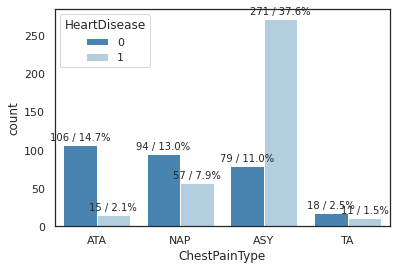

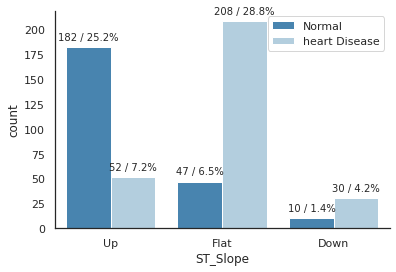

In [31]:
CAT_VAR_NOM = ['ChestPainType', 'ST_Slope']
plot_variables_qualitatives(data, CAT_VAR_NOM)

## 5.3 variables binaires

['Sex', 'ExerciseAngina']


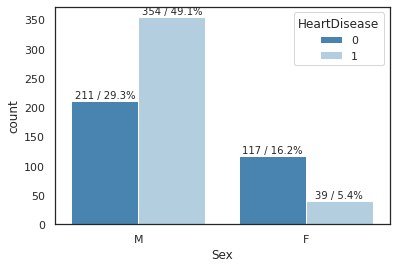

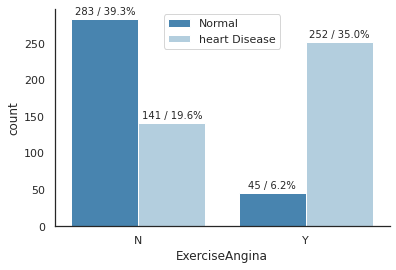

In [32]:
print(BIN_VAR)
plot_variables_qualitatives(data, BIN_VAR)